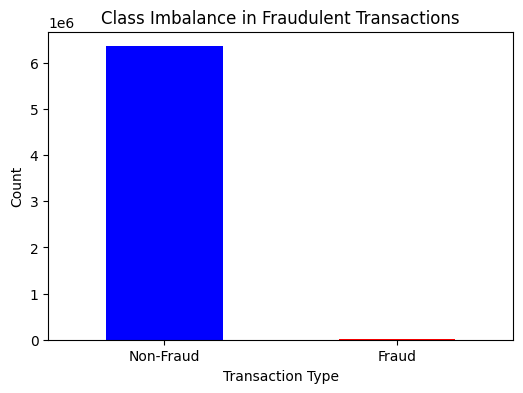

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from CSV
df = pd.read_csv("/kaggle/input/onlinefraud/onlinefraud.csv")  # Replace with your actual file path

# Count the number of fraud and non-fraud transactions
fraud_counts = df["isFraud"].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"], rotation=0)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Imbalance in Fraudulent Transactions")
plt.show()

Resampled dataset saved as 'resampled_data.csv'.
Class distribution after SMOTE: Counter({0: 6354407, 1: 6354407})


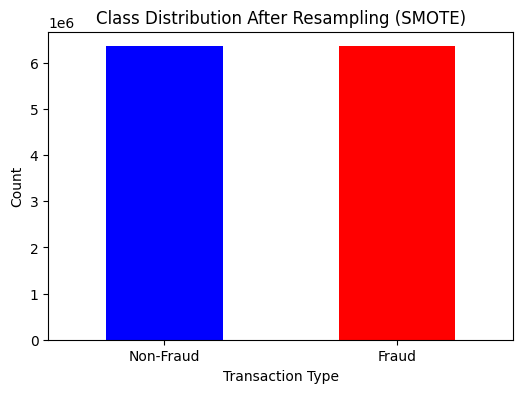

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Load dataset
df = pd.read_csv("/kaggle/input/onlinefraud/onlinefraud.csv")  # Replace with your actual file path

# Encode categorical columns
label_encoders = {}
categorical_columns = ["type", "nameOrig", "nameDest"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders in case you need to reverse-transform

# Separate features and target
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["isFraud"] = y_resampled  # Add the target column back

# Save to CSV
df_resampled.to_csv("resampled_data.csv", index=False)
print("Resampled dataset saved as 'resampled_data.csv'.")

# Display new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

# Plot the bar chart
plt.figure(figsize=(6, 4))
pd.Series(y_resampled).value_counts().plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"], rotation=0)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Distribution After Resampling (SMOTE)")
plt.show()
